**IMPORTING THE LIBARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**IMPORTING THE DATASET**

In [ ]:
dataset= pd.read_csv('SwedishMotorInsurance.csv')
dataset
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

**TAKING CARE OF MISSING DATA**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[[  1.     1.     1.     1.   455.13 108.  ]
 [  1.     1.     1.     2.    69.17  19.  ]
 [  1.     1.     1.     3.    72.88  13.  ]
 ...
 [  5.     7.     7.     7.     2.83   1.  ]
 [  5.     7.     7.     8.    13.06   0.  ]
 [  5.     7.     7.     9.   384.87  16.  ]]


**SPLITING THE DATASET INTO THE TRAINING SET AND TEST SET**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
print(X_train)

[[3.00000e+00 7.00000e+00 4.00000e+00 3.00000e+00 9.60000e-01 0.00000e+00]
 [5.00000e+00 3.00000e+00 7.00000e+00 6.00000e+00 5.23390e+02 1.40000e+01]
 [1.00000e+00 7.00000e+00 3.00000e+00 4.00000e+00 4.61800e+01 1.00000e+00]
 ...
 [3.00000e+00 4.00000e+00 4.00000e+00 1.00000e+00 9.30380e+02 5.30000e+01]
 [1.00000e+00 4.00000e+00 6.00000e+00 2.00000e+00 2.98730e+02 5.00000e+00]
 [3.00000e+00 3.00000e+00 7.00000e+00 2.00000e+00 1.68152e+03 7.10000e+01]]


In [ ]:
print(X_test)

[[ 5.    2.    5.    5.   25.1   1.  ]
 [ 5.    7.    5.    5.    0.7   0.  ]
 [ 4.    7.    3.    2.    1.61  0.  ]
 ...
 [ 4.    7.    5.    3.    0.2   0.  ]
 [ 1.    5.    6.    3.   40.03  1.  ]
 [ 5.    3.    3.    2.   31.55  3.  ]]


In [ ]:
print(Y_train)

[     0  62013    756 ... 294693  16182 377529]


In [ ]:
print(Y_test)

[  31442       0       0  152944  251193   79870   12608       0    4521
   31442       0    1710       0    2288    9979   69277  168380  116227
   38663  233769  912421       0   38560   55595   23091   15229   12288
       0   88961       0   72563  731869    7647  447128   18455       0
 1097124       0  201401  153830   23893   57899    1144 5173923    4249
   45498   13026    7403 2133862   38542   42686       0  858717  329632
   58588  120719  436313  121196  775364    1450   42369  142262   56739
    6020    4855       0       0   13238       0    9525   23206   25329
       0  578831   69025       0       0     435 2249007   80714 4387841
  122651       0    4656 1044585  489424    2289    4868       0 7698320
    2193 2833885  391512    3000   31442 2873487   95879    4422       0
 1401833    6102    8064   31442   22495  623928    6387  234344       0
  155704    4225  124101  403488       0 1031429  785697  230920  135172
       0  364718   51380  604161    1684   86801   

In [ ]:
print(dataset.describe())

        Kilometres         Zone        Bonus         Make        Insured  \
count  2182.000000  2182.000000  2182.000000  2182.000000    2182.000000   
mean      2.985793     3.970211     4.015124     4.991751    1092.195270   
std       1.410409     1.988858     2.000516     2.586943    5661.156245   
min       1.000000     1.000000     1.000000     1.000000       0.010000   
25%       2.000000     2.000000     2.000000     3.000000      21.610000   
50%       3.000000     4.000000     4.000000     5.000000      81.525000   
75%       4.000000     6.000000     6.000000     7.000000     389.782500   
max       5.000000     7.000000     7.000000     9.000000  127687.270000   

            Claims       Payment  
count  2182.000000  2.182000e+03  
mean     51.865720  2.570076e+05  
std     201.710694  1.017283e+06  
min       0.000000  0.000000e+00  
25%       1.000000  2.988750e+03  
50%       5.000000  2.740350e+04  
75%      21.000000  1.119538e+05  
max    3338.000000  1.824503e+07  


*VISULATION THE DATA*

<Axes: >

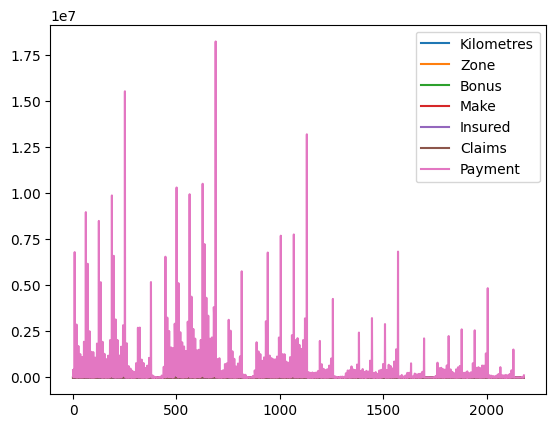

In [ ]:
dataset.plot()

Kilometres       Axes(0.125,0.11;0.0945122x0.77)
Zone          Axes(0.238415,0.11;0.0945122x0.77)
Bonus         Axes(0.351829,0.11;0.0945122x0.77)
Make          Axes(0.465244,0.11;0.0945122x0.77)
Insured       Axes(0.578659,0.11;0.0945122x0.77)
Claims        Axes(0.692073,0.11;0.0945122x0.77)
Payment       Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

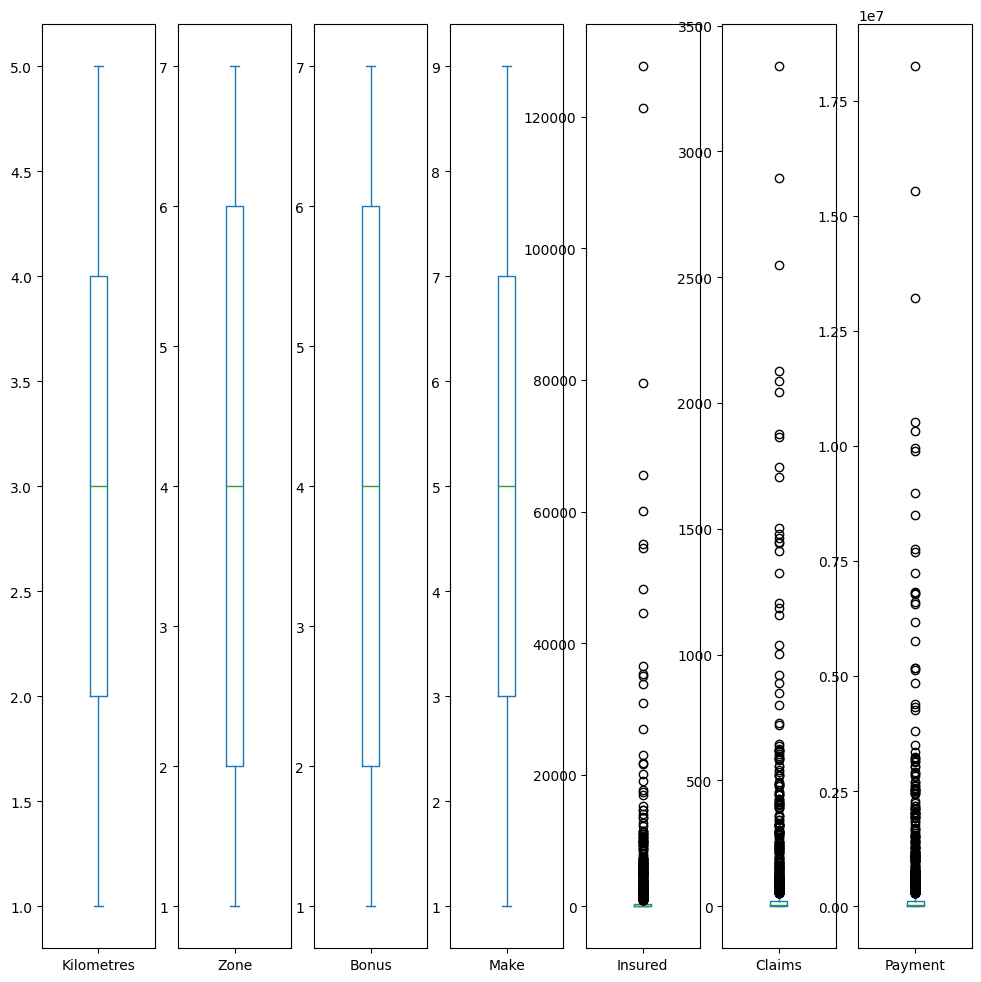

In [ ]:
dataset.plot(kind='box', subplots=True, figsize=(12, 12))

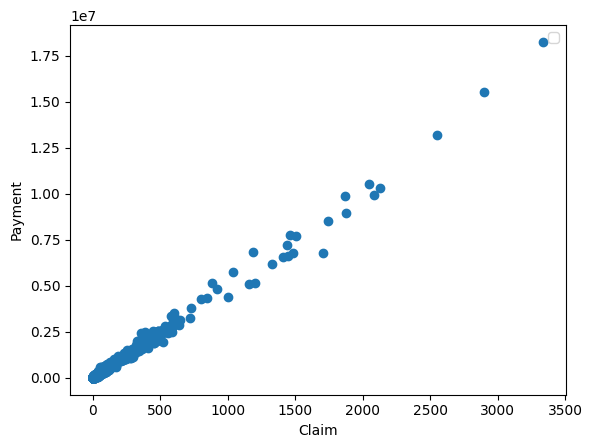

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dataset['Claims'],dataset['Payment'])
plt.xlabel('Claim')
plt.ylabel('Payment')
plt.legend()
plt.show()

**TRAINING THE SIMPLE LINEAR REGRESSION MODEL ON THE TRAINING SET **

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
payment_pred = regressor.predict(X_test)

In [ ]:
print(payment_pred)

[ 1.11691911e+04  1.59787829e+04  1.55904988e+04  2.57873835e+05
  2.45553253e+05  7.88282205e+04  1.57378429e+04  4.39157166e+03
 -2.01139716e+03  1.76735841e+04  2.90792234e+03  8.90535006e+03
  2.91541041e+03  1.09264273e+04  1.91825776e+04  2.72860570e+04
  7.76327887e+04  1.12239974e+05  3.13575533e+04  2.65735089e+05
  7.50963660e+05  3.10197865e+03  1.32371738e+04  6.19889531e+04
  3.15050646e+04  3.09910049e+04  2.88989381e+04  2.30745182e+04
  7.85027746e+04 -2.18196340e+03  6.75995851e+04  5.57244280e+05
 -6.67296230e+02  3.89186666e+05  4.28681384e+04  1.94375944e+04
  1.06730044e+06  1.17782284e+04  3.43255791e+05  1.06253588e+05
  1.98529970e+04  7.30554225e+04 -7.13953352e+03  5.52024490e+06
  1.21803932e+04  2.25099981e+04  2.61736185e+04  2.45283021e+04
  1.90004592e+06  1.07704912e+04  2.91243680e+04  9.64083595e+03
  8.92566175e+05  3.20885991e+05  4.48924516e+04  1.68835047e+05
  4.01715268e+05  1.08936429e+05  6.22567692e+05  1.59111893e+04
  3.92915321e+04  1.47559

**TRAINING THE POLYNOMIAL REGRESSION MODEL ON THE WHOLE DATASET**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)
lin_reg_2.coef_

array([ 6.11450380e-01, -3.35545320e+00,  9.09632760e-02, -4.42436342e-03,
        1.30948476e-03,  2.68959905e-01,  3.98969408e-02, -6.07060150e-03,
       -1.17578833e-02, -6.23926412e-03, -5.31453730e-03,  5.46371177e-01,
        7.97917666e-02, -2.36382102e-02, -1.63836073e-02, -1.24217233e-02,
        4.99610041e-01,  7.76947006e-02, -8.50618648e-03, -5.38209708e-03,
        6.46796275e-01,  7.87643910e-02, -1.28822371e-03,  4.76650434e-01,
        1.02677162e-01, -2.48516025e-01,  9.47636900e+00,  1.98188443e+00,
       -3.31767234e-02, -5.07774498e-02, -3.35587948e-02, -2.90364535e-02,
        9.17223498e-01,  1.98647434e-01, -8.38739229e-02, -5.93063274e-02,
       -4.99785681e-02,  8.67650923e-01,  1.56007325e-01, -3.80825317e-02,
       -2.96998466e-02,  1.17296346e+00,  1.50611638e-01, -2.08974072e-02,
        8.60820105e-01,  2.51377743e-01, -3.81456232e-02,  8.68332760e-01,
        1.49583484e+00, -1.67120111e-01, -1.21995968e-01, -9.52094061e-02,
        1.47938180e+00,  